### SPAM EMAIL DETECTION: CLASSIFICATION AND NATURAL LANGUAGE PROCESSING

Deciding which class an email belongs to, spam or not spam is a classification problem. Solving this requires the use of supervised machine learning. Our dataset is a collection of emails that have already been labeled as spam or ham. Our model will learn to classify an email as spam or not depending on the contents of the email.<br>
This project utilizes the Bernoulli Naive Bayes algorithm.

### ABOUT THE ALGORITHM
Naive Bayes is a classification algorithm of Machine Learning based on Bayes theorem which gives the likelihood of occurrence of the event. Naive Bayes classifier is a probabilistic classifier which means that given an input, it predicts the probability of the input being classified for all the classes. It is also called conditional probability.<BR>
    
Two important assumptions made for Naive Bayes Classifier:
•	First is that the attributes are independent of each other and does not affect each others performance, this is the reason it is called 'naive'.
•	Second is that all the features are given equal importance. For example if there are 10 features, knowing only 5 features will not give us accurate outcome. All features are necessary to predict outcome and are given equal importance.<BR>

Bayes theorem can be used for many real life scenarios like spam detection, credit card fraud detection, disease detection, sentiment analysis and many more.<BR>
    
There are three types of Naive Bayes Classifiers:<BR>
    1.	Multinomial Naive Bayes - Widely used classifier for document classification which keeps the count of frequent words present in the documents.<BR>
    2.	Bernoulli Naive Bayes - Used for discrete data, where features are only in binary form.<BR>
    3.	Gaussian Naive Bayes - Used when we are dealing with continuous data and uses Gaussian distribution.<BR>
    
  Bernoulli Naive Bayes <BR>
This is used for discrete data and it works on Bernoulli distribution. The main feature of Bernoulli Naive Bayes is that it accepts features only as binary values like true or false, yes or no, success or failure, 0 or 1 and so on. So when the feature values are binary we know that we have to use Bernoulli Naive Bayes classifier.<BR>
    
Bernoulli distribution<BR>
As we deal with binary values, let's consider 'p' as probability of success and 'q' as probability of failure and q=1-p
For a random variable 'X' in Bernoulli distribution,
 
where 'x' can have only two values either 0 or 1
Bernoulli Naive Bayes Classifier is based on the following rule:
P ( x i ∣ y ) = P ( i ∣ y ) x i + ( 1 − P ( i ∣ y ) ) ( 1 − x i ) <BR>


Advantages of Bernoulli Naive Bayes:<BR>
1.	They are extremely fast as compared to other classification models and are able to make real-time predictions.<BR>
2.	As in Bernoulli Naive Bayes each feature is treated independently with binary values only, it explicitly gives penalty to the model for non-occurrence of any of the features which are necessary for predicting the output y. And the other multinomial variant of Naive Bayes ignores this features instead of penalizing.<BR>
3.	In case of small amount of data or small documents(for example in text classification), Bernoulli Naive Bayes gives more accurate and precise results as compared to other models.<BR>
4.	It can handle irrelevant features nicely and results are self explanatory.<BR>
    
    
Disdvantages of Bernoulli Naive Bayes:
1.	Being a naive(showing a lack of experience) classifier, it sometimes makes a strong assumption based on the shape of data.<BR>
2.	If at times the features are dependent on each other then Naive Bayes assumptions can affect the prediction and accuracy of the model and is sensitive to the given input data.<BR>
3.	If there is a categorial variable which is not present in training dataset, it results in zero frequency problem. This problem can be easily solved by Laplace estimation.<BR>
From all the above we can see Bernoulli Naive Bayes is a very good classifier for problems where the features are binary. It gives very good accuracy and can be esaily trained.

## About the dataset

The csv file contains 5568 rows, each row for each email. There are 2 columns. The first column indicates the labels for prediction : spam,and ham for not spam. The last column has the contents of the email.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
from glob import glob#library that helps us search for files
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from sklearn.naive_bayes import BernoulliNB  
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

warnings.simplefilter(action="ignore", category=FutureWarning)


In [2]:
df=pd.read_csv("/Users/bambino/Documents/DATASETS/spaamemail.csv.xls").rename(columns={'v1':'Target','v2':'Text'})
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


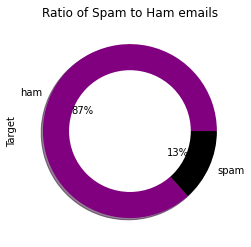

In [3]:
df['Target'].value_counts().plot(kind='pie',autopct='%0.0f%%',shadow=True,colors=['Purple','k'])

circle=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(circle)

plt.title('Ratio of Spam to Ham emails');

Our data is in text form, unfortunately, machines don't understand text as we do, However, they are excellent calculators so we need to convert our text into a structure machines can understand, vectors.<br>

The first step of vectorization is tokenization. Tokenization is the process of chopping a document into pieces(called tokens) of a specified length. A token is an instance of a sequence of characters grouped together as a useful semantic unit for processing, it is the meaningful bit of language we want our model to learn from. Tokens are usually arrays of strings. These arrays are then converted to vectors through a process called Vectorization.

Vectorization is the process of mapping words into numeric values. Scikit-Learn's CountVectorizer helps with this. Any document can be encoded as a fixed length vector with the length of vocabulary of known words. In this project, the vector will be the length of distinct words. 

Sometimes, when the email contents are a lot, the vectors can become long and cumbersome during calculations. To solve this, we need to shrink the corpus without loosing much meaningful data. 

Once we've vectorized our corpus with the CountVectorizer, we move to stopwords. Stopwords are common words that od little to no value in determining whether a message is spam or not. In scikitlearn's countvectorizer, there is an option for corpus specific stopwords, you can pass an array of stopwords or automate the process with the minimum and mmaximum document frequnecy arguments.

The CountVectorizer tokenizes, vectorizes and creates a stoplist, all we need to do is to add it to our pipeline. A ML Pipeline helps to automate ML workflows.

### DATA SPLITTING AND ML PIPELINE

In [4]:
X=df['Text']
y=df['Target']      

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=21)

In [6]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4454,), (1114,), (4454,), (1114,))

#### Bernoulli_pipeline

In [7]:
bernoulli_pipeline=make_pipeline(CountVectorizer(binary=True),BernoulliNB(alpha=0.000006))

In [8]:
bernoulli_pipeline.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(binary=True)),
                ('bernoullinb', BernoulliNB(alpha=6e-06))])

In [9]:
y_pred_bn=bernoulli_pipeline.predict(X_test)

#### Logistic regression

In [10]:
log_pipeline=make_pipeline(CountVectorizer(binary=True),LogisticRegression())

In [11]:
log_pipeline.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(binary=True)),
                ('logisticregression', LogisticRegression())])

In [12]:
y_pred_log=log_pipeline.predict(X_test)

### TESTING WITH PERSONAL EMAILS

In [13]:
def predictions(text):
    text=[text]
    bn_pred=bernoulli_pipeline.predict(text)
    log_pred=log_pipeline.predict(text)
    if bn_pred=='spam':
        print('Bernoulli NB predicts Your email is spam!')
    elif bn_pred=='ham':
        print('Bernoulli NB predicts Your email is not spam!')
    


In [14]:
predictions('They say don’t be afraid of growing slowly, but be afraid of stopping. So keep learning because your certificate in Machine Learning Course with your name on it is waiting for you.')

Bernoulli NB predicts Your email is not spam!


In [15]:
predictions('We are conducting a research to see the opinions of project managers and data scientists on what are the best current practices for project management in data science and AI projects.Help us, fill the short questionnaire below, and we will publicly thank you on social media 🚀🚀🚀')

Bernoulli NB predicts Your email is not spam!


In [16]:
predictions('This is your last chance to register for our digital marketing training…before we close down the registration portal in less than 3 hours and increase our tuition fees')

Bernoulli NB predicts Your email is not spam!


In [17]:
predictions('Check out this great opportunity from ... and get rewarded with free entry bonuses')

Bernoulli NB predicts Your email is spam!


### MODEL EVALUATION

1. Cross Validation with accuracy

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
#10-fold cross validation
print('Mean accuracy score: 98%')
cross_val_score(bernoulli_pipeline,X_train,y_train,cv=10,scoring='accuracy')


Mean accuracy score: 98%


array([0.99327354, 0.98430493, 0.98430493, 0.98654709, 0.97977528,
       0.99101124, 0.98651685, 0.98876404, 0.98651685, 0.98202247])

In [20]:
#10-fold cross validation
print('Mean accuracy score: 98%')
cross_val_score(log_pipeline,X_train,y_train,cv=10,scoring='accuracy')

Mean accuracy score: 98%


array([0.97982063, 0.97757848, 0.97533632, 0.98430493, 0.96853933,
       0.98202247, 0.98876404, 0.98651685, 0.97977528, 0.98426966])

2. Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
comf=confusion_matrix(y_test,y_pred_bn)
comf

array([[968,   1],
       [ 11, 134]], dtype=int64)

968 values were accurately predicted as not spam.<br>
1 value was inaccurately predicted as not spam.<br>
11 values were inaccurately predicted as spam.<br>
134 values were accurately predicted as spam.<br>

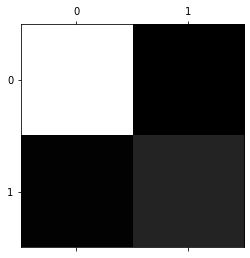

In [23]:
plt.matshow(comf,cmap=plt.cm.gray)

In [24]:
conf_log=confusion_matrix(y_test,y_pred_log)
conf_log

array([[968,   1],
       [ 17, 128]], dtype=int64)

968 values were accurately predicted as not spam.<br>
1 value was inaccurately predicted as not spam.<br>
17 values were inaccurately predicted as spam.<br>
128 values were accurately predicted as spam.<br>

3. Classification report

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,y_pred_bn))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       969
        spam       0.99      0.92      0.96       145

    accuracy                           0.99      1114
   macro avg       0.99      0.96      0.98      1114
weighted avg       0.99      0.99      0.99      1114



In [27]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       969
        spam       0.99      0.88      0.93       145

    accuracy                           0.98      1114
   macro avg       0.99      0.94      0.96      1114
weighted avg       0.98      0.98      0.98      1114




Precision: This is the accuracy of positive predictions. It is the ability of a classifier to not classify an instance as positive if its negative. Precision measures the number of emails our classifier currently predicted as spam<br>

Precision=TP/(TP + FP)<BR>
    
A trivial way to get a perfect precision will be to predict one positive prediction and make sure it is correct(1/1=100%). This would not be very useful since the classifier would only focus on that one positive prediction and forget all other instances. So, precision is usually used along side another metric, recall.<br>
    
Recall: Also known as sensitivity or true positive rate(TPR). It is the ratio of positive instances correctly detected by the classifier. It is the ability of the classifier to find all the positive samples. Recall measures the amount of actual spam emails our classifier detected.<br>

Recall=TP/(TP+FN)

F1 favors classifiers that have similar precision and recall(although it mostly favors recall). This is not always what you want, sometimes, you might favor precision over recall or vice-versa. For example, if you train a detector that detects videos that are safe for kids, you would prefer high precision(safe videos) over low recall(good videos). Recall will detect all videos it considers safe but some unsafe videos might sneak in.<br>

On the other hand, you might favor high recall and low precision if you're training a classifier to detect shoplifters on surveillance images. With high recall, the classifier detects all shoplifting instances(and some false alerts).

However, you can't have it both ways, increasing precision decreases recall and vice-versa. This is called precision/recall trade-off.

### SAVING MODEL

In [28]:
joblib.dump(bernoulli_pipeline,'Bernoulli.joblib')

['Bernoulli.joblib']

In [29]:
joblib.dump(log_pipeline,'LogisticReg.joblib')

['LogisticReg.joblib']